1. How to import pandas and check the version?

In [2]:
import pandas as pd
print(f"1: Сurrent version: {pd.__version__}")
print("\n2:")
# pd.show_versions(as_json=False)
print("\n3:")
# !pip show pandas


1: Сurrent version: 2.2.2

2:

3:


---
2. How to create a series from a list, numpy array and dict?

Create a pandas series from each of the items below: a list, numpy and a dictionary

In [3]:
import numpy as np
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

list2ser = pd.Series(mylist)
print(f"Series from the list:\n{list2ser}")

arr2ser = pd.Series(myarr)
# print(f"Series from the ndarray: {arr2ser}")

dict2ser = pd.Series(mydict)
# print(f"Series from the list: {dict2ser}")

Series from the list:
0     a
1     b
2     c
3     e
4     d
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object


---
3. How to convert the index of a series into a column of a dataframe?

Difficulty Level: L1

Convert the series ser into a dataframe with its index as another column on the dataframe.

In [4]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

df = ser.to_frame().reset_index()
df.head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


---
4. How to combine many series to form a dataframe?

Difficulty Level: L1

Combine ser1 and ser2 to form a dataframe.

In [5]:
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

df = pd.concat([ser1, ser2], axis=1)
df.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


---
5. How to assign name to the series’ index?

Difficulty Level: L1

Give a name to the series ser calling it ‘alphabets’.

In [6]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

ser.name = "alphabets"

ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

---
6. How to get the items of series A not present in series B?

Difficulty Level: L2

From ser1 remove items present in ser2.

In [9]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

print("Elements not contained in ser2:")
ser1[~ser1.isin(ser2)]

Elements not contained in ser2:


0    1
1    2
2    3
dtype: int64

---
7. How to get the items not common to both series A and series B?

Difficulty Level: L2

Get all items of ser1 and ser2 not common to both.

In [18]:
import numpy as np
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

print("Symmetric difference with pandas:")
print(pd.concat([ser1[~ser1.isin(ser2)], ser2[~ser2.isin(ser1)]]))

print("Symmetric difference with numpy:")
print(np.setxor1d(ser1, ser2))

Symmetric difference with pandas:
0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64
Symmetric difference with numpy:
[1 2 3 6 7 8]


---
8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

Difficuty Level: L2

Compute the minimum, 25th percentile, median, 75th, and maximum of ser.

Minimum: 0.7914002917936092
25th percentile: 5.807798514052851
Median: 8.883159768369168
25th percentile: 13.94948014158544
Maximum: 20.612724165552127


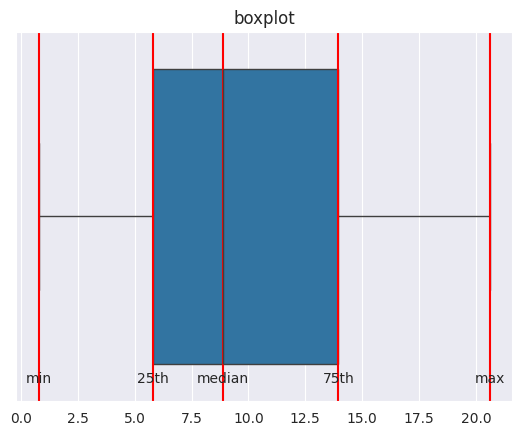

In [98]:
ser = pd.Series(np.random.normal(10, 5, 25))

print(f"Minimum: {ser.min()}")
print(f"25th percentile: {ser.quantile(0.25)}")
print(f"Median: {ser.median()}")
print(f"25th percentile: {ser.quantile(0.75)}")
print(f"Maximum: {ser.max()}")

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.boxplot(ser, orient="h")

lines = {
    "min": ser.min(),
    "25th": ser.quantile(0.25),
    "median": ser.median(),
    "75th": ser.quantile(0.75),
    "max": ser.max()
}

# Добавление вертикальных линий и текста
for label, value in lines.items():
    plt.axvline(value, color="red")
    plt.text(value, 0.45, label, ha='center')

plt.title("boxplot")
plt.show()

---
9. How to get frequency counts of unique items of a series?

Difficulty Level: L1

Calculte the frequency counts of each unique value ser.

In [77]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
print("Frequency counts:")
ser.value_counts()

Frequency counts:


d    5
e    4
b    4
c    4
g    4
a    4
f    3
h    2
Name: count, dtype: int64

---
10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

Difficulty Level: L2

From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.

In [108]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

print(f"Top 2 frequency:")
print(count := ser.value_counts(sort=True, ascending=False)[:2])

ser  = ser.apply(lambda x: x if x in count else "Other")
ser.head()

Top 2 frequency:
2    4
1    3
Name: count, dtype: int64


0        2
1        2
2        2
3        1
4    Other
dtype: object

---
11. How to bin a numeric series to 10 groups of equal size?

Difficulty Level: L2

Bin the series ser into 10 equal deciles and replace the values with the bin name.


In [124]:
ser = pd.Series(np.random.random(20))
pd.cut(ser, bins=10, labels=[f"{i}th" for i in range(1, 11)]).head()

0     6th
1     7th
2     9th
3     4th
4    10th
dtype: category
Categories (10, object): ['1th' < '2th' < '3th' < '4th' ... '7th' < '8th' < '9th' < '10th']

---
12. How to convert a numpy array to a dataframe of given shape? (L1)

Difficulty Level: L1

Reshape the series ser into a dataframe with 7 rows and 5 columns

In [125]:
ser = pd.Series(np.random.randint(1, 10, 35))

df = pd.DataFrame(ser.to_numpy().reshape((5, 7)))

df.head()

,0,1,2,3,4,5,6
0,7,4,8,8,9,4,1
1,1,5,3,4,4,3,8
2,3,5,5,5,6,3,2
3,5,5,2,7,4,3,3
4,1,9,1,2,2,1,4


----
13. How to find the positions of numbers that are multiples of 3 from a series?

Difficulty Level: L2

Find the positions of numbers that are multiples of 3 from ser.

In [129]:
ser = pd.Series(np.random.randint(1, 10, 7))

print(f"positions of numbers that are multiples of 3: {ser[ser % 3 == 0].index}")

positions of numbers that are multiples of 3: Index([0, 2, 4], dtype='int64')


---
14. How to extract items at given positions from a series

Difficulty Level: L1

From ser, extract the items at positions in list pos.

In [131]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

print(f"Elements in positions: {pos}")
ser[pos]

Elements in positions: [0, 4, 8, 14, 20]


0     a
4     e
8     i
14    o
20    u
dtype: object

---
15. How to stack two series vertically and horizontally ?

Difficulty Level: L1

Stack ser1 and ser2 vertically and horizontally (to form a dataframe).

In [136]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

pd.concat([ser1, ser2], axis=1)
# pd.concat([ser1, ser2], axis=0)

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


---
16. How to get the positions of items of series A in another series B?

Difficulty Level: L2

Get the positions of items of ser2 in ser1 as a list.

In [144]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])
print(f"Index: {ser1[ser1.isin(ser2)].index.to_list()}")

Index: [0, 4, 5, 8]


---
17. How to compute the mean squared error on a truth and predicted series?

Difficulty Level: L2

Compute the mean squared error of truth and pred series.

In [148]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)


print(f"mean squared error of truth and pred: {((truth-pred)**2).mean()}")

mean squared error of truth and pred: 0.37022176329526724


---
18. How to convert the first character of each element in a series to uppercase?

Difficulty Level: L2

Change the first character of each word to upper case in each word of ser.

In [149]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

print("Title:")

ser.str.title()

0     How
1      To
2    Kick
3    Ass?
dtype: object

---
19. How to calculate the number of characters in each word in a series?

Difficulty Level: L2

In [153]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
print("Length:")
ser.str.len()

Length:


0    3
1    2
2    4
3    4
dtype: int64

---
20. How to compute difference of differences between consequtive numbers of a series?

Difficulty Level: L1

Difference of differences between the consequtive numbers of ser.

In [161]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

print(ser.diff().tolist())
print(ser.diff().diff().tolist())


[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]


---
21. How to convert a series of date-strings to a timeseries?

Difficiulty Level: L2

In [166]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser = ser.astype("datetime64[ns]")
ser

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

---
22. How to get the day of month, week number, day of year and day of week from a series of date strings?

Difficiulty Level: L2

Get the day of month, week number, day of year and day of week from ser.

In [179]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser = ser.astype("datetime64[ns]")
print(f"Day:\n{ser.dt.day.to_list()}")
print(f"Week:\n{ser.dt.isocalendar().week.to_list()}")
print(f"Day of year:\n{ser.dt.day_of_year.to_list()}")
print(f"Day of week:\n{ser.dt.day_name().to_list()}")

Day:
[1, 2, 3, 4, 5, 6]
Week:
[53, 5, 9, 14, 19, 23]
Day of year:
[1, 33, 63, 94, 125, 157]
Day of week:
['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']


---
23. How to convert year-month string to dates corresponding to the 4th day of the month?

Difficiulty Level: L2

Change ser to dates that start with 4th of the respective months.

In [184]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])
ser = pd.to_datetime(ser + " 4", format="%b %Y %d")
ser

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

---
24. How to filter words that contain atleast 2 vowels from a series?

Difficiulty Level: L3

From ser, extract words that contain atleast 2 vowels.

In [213]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])
import re
ser[ser.isin([el for el in ser if re.findall(r"[aeiou]", el.lower()).__len__() >= 2])]


0     Apple
1    Orange
4     Money
dtype: object

---
25. How to filter valid emails from a series?

Difficiulty Level: L3

Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference.

In [216]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

print("Valid email:")
emails[emails.str.contains(pattern, regex=True)]

Valid email:


1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object